In [1]:
import geopandas as gpd
import heapq
import numpy as np
import matplotlib.pyplot as plt
import itertools

In [2]:
def doPlot():
    crimedataLocation = 'Shape/crime_dt.shp' 
    gridsize = 0.003
    crimedata = gpd.read_file(crimedataLocation)
    
    source = np.array([-73.55,45.49])
#     print(source[1])
    destination = np.array([-73.59,45.53])
    #crimedata.plot()
#      (-73.59, 45.49), (-73.55, 45.49), (-73.55, 45.53), (-73.59, 45.53)
    bounds=np.array([[-73.59,45.49],[-73.55,45.49],[-73.55,45.53],[-73.59,45.53]])
    long,lat = bounds.T
    
    #gridy = np.arange(min(lat),max(lat),gridsize)

    gridx = crange(min(long), max(long),gridsize)
    #print(gridx)
    latLongY= crange(max(lat),min(lat),-gridsize)
    gridy = crange(min(lat), max(lat),gridsize)
    #print(gridy)
    latLong = np.array(list(itertools.product(gridx, latLongY)))
    #print("Latlong",latLong)
    c = (max(lat) - min(lat))/gridsize
    d = (max(long) - min(long))/gridsize
    c = int(round(c)) + 1
    d = int(round(d)) + 1
#     print('cccccc',c)
    latLong =latLong.reshape(c,d,-1)
#     print('latLonggg',latLong)
#     print('latLonggg',latLong.shape)
#     latLong = np.flip(latLong,0)
    
    
    #the condition to find the index
    l = np.where(np.logical_and(latLong >=source[0], latLong < (source[0] + gridsize)))
    r = np.where(np.logical_and(latLong >= source[1], latLong < (source[1] + gridsize)))
    listOfCoordinates= list(zip(l[0], l[1]))
    listOfCoordinates1= list(zip(r[0], r[1]))
    value = tuple(set(listOfCoordinates) & set(listOfCoordinates1))
#     print('value[0]',value[0])
    
    s = np.where(np.logical_and(latLong >=destination[0], latLong < (destination[0] + gridsize)))
    t = np.where(np.logical_and(latLong >= destination[1], latLong < (destination[1] + gridsize)))
    listOfCoordinates2= list(zip(s[0], t[1]))
    listOfCoordinates3= list(zip(s[0], t[1]))
    value1 = tuple(set(listOfCoordinates2) & set(listOfCoordinates3))
    
#     print(listOfCoordinates)
#     print(listOfCoordinates1)
    #print("tuple value",value[0])
    #print("tuple value1",value1[0])
    #i,j = np.where(np.logical_and(latLong[:,0] == '-73.55', latLong[:,1] == '45.49' ))
    
    #filter = np.asarray(['-73.55'])
    #latLong[np.in1d(latLong[:, 1], filter)]
    #print(i," ",j)
    #print(latLong[:,0])
    #rows1 = np.where(np.logical_and(latLong[:,1] >= 45.49, latLong[:,1] <= ( 45.49 + gridsize)))
    #result = latLong[i,j]
    #result1 = latLong[rows1]
    #print('checkkkkkkk',result)
    #print('checkkkkkkk1',result1)
    #print(r)
    #np.logical_and((latLong[0] >=-73.55, latLong[0] <= (-73.55 + gridsize)))
    #position = index_2d(latLong[:,0], -73.55)  # (4, 3)
    #print(latLong[position[0]][position[1]])
    #ind,ind1 = np.where(np.array(latLong[:,:]) == source[0,0])
    #print(ind)


    #print(latLong)
    #print(latLong[20,0])
    #print(latLong[20,20])
    #print(latLong[0,20])
    
    
    H, xedges, yedges = np.histogram2d(crimedata['geometry'].x, crimedata['geometry'].y,bins=[gridx, gridy])
    #print(crimedata['geometry'].T)
    #print(H.shape)
    plt.figure()
    #plt.plot(x,y,'ro')
    #plt.grid(True)
    #plt.figure()
    myextent  =[xedges[0],xedges[-1],yedges[0],yedges[-1]]
#     plt.imshow(H.T,origin='low',extent=myextent,interpolation='nearest',aspect='auto')
    #plt.plot(x,y,'ro')
    #plt.colorbar()
    #plt.scatter(x,y,100,'r')
#     plt.show()
    return H,xedges,yedges,gridsize,tuple(value[0]),tuple(value1[0]),latLong


In [3]:
def cust_range(*args, rtol=1e-05, atol=1e-08, include=[True, False]):
    if len(args) == 1:
        start = 0
        stop = args[0]
        step = 0.008
    elif len(args) == 2:
        start, stop = args
        step = 0.002
    else:
        assert len(args) == 3
        start, stop, step = tuple(args)

    # determine number of segments
    n = (stop-start)/step + 1

    # do rounding for n
    if np.isclose(n, np.round(n), rtol=rtol, atol=atol):
        n = np.round(n)

    # correct for start/end is exluded
    if not include[0]:
        n -= 1
        start += step
    if not include[1]:
        n -= 1
        stop -= step

    return np.linspace(start, stop, int(n))
def crange(*args, **kwargs):
    return cust_range(*args, **kwargs, include=[True, True])


In [4]:
def thresholdCalc(H):
    threshold = int(65)
    sorted_array = H.reshape(1,-1)
    sorted_array.sort()
    highriskNum = sorted_array[0][int(threshold/100 * sorted_array.shape[1])]
    # print("Total crimes", np.sum(H))
    mean = np.mean(H)
#     print("Mean is ",mean)
    sd = np.std(H)
#     print("Standard Deviation is ",sd)
    return round(highriskNum,0)
    
    


In [5]:
def cust_range(*args, rtol=1e-05, atol=1e-08, include=[True, False]):
    if len(args) == 1:
        start = 0
        stop = args[0]
        step = 0.002
    elif len(args) == 2:
        start, stop = args
        step = 0.002
    else:
        assert len(args) == 3
        start, stop, step = tuple(args)

    # determine number of segments
    n = (stop-start)/step + 1

    # do rounding for n
    if np.isclose(n, np.round(n), rtol=rtol, atol=atol):
        n = np.round(n)

    # correct for start/end is exluded
    if not include[0]:
        n -= 1
        start += step
    if not include[1]:
        n -= 1
        stop -= step

    return np.linspace(start, stop, int(n))
def crange(*args, **kwargs):
    return cust_range(*args, **kwargs, include=[True, True])


In [6]:
def heuristic(a, b):
    return np.sqrt((b[0] - a[0]) ** 2 + (b[1] - a[1]) ** 2)

In [7]:
class Graphnode:
    def __init__(self):
        self.position = 0
        self.gScore = 0
        self.hScore = 0
        self.parent = 0
        self.fscore = 0

In [8]:
def astar(start, goal, reversesorted_array):
    steps = [(0,1),(0,-1),(1,1),(-1,-1),(1,0),(-1,0),(-1,1),(1,-1)]
    
    closedList = []
    openList = []
    goalNode = Graphnode()
    goalNode.position = goal
    goalNode.parent = -1
    goalNode.gScore = 0
    goalNode.hScore = 0
    
    startNode = Graphnode()
    startNode.position = start
    startNode.parent = -1
    startNode.gScore = 0
    startNode.hScore = heuristic(startNode.position , goalNode.position)
    startNode.fscore = startNode.gScore + startNode.hScore
    
    openList.append(startNode)
    while len(openList):
        currentNode = openList[0]
        exploreNode = True
        foundInClosedList = False
        for node in openList:
            if node.fscore < currentNode.fscore:
                currentNode = node
        openList.remove(currentNode)
        
        if currentNode.position == goalNode.position:
            data = [currentNode.position]
            print('Path Cost : ',currentNode.gScore)
            while True : 
                currentNode = currentNode.parent
                data.append(currentNode.position)
                if currentNode.parent == -1:
                    break
            return data
        
        for index in range(len(closedList)):
            node = closedList[index]
            if currentNode.position == node.position:
                foundInClosedList = True
                if currentNode.fscore >= node.fscore:
                    exploreNode = False
                else:
                    closedList[index].fscore = currentNode.fscore
                break
        if exploreNode == False:
            continue
        if foundInClosedList == False:
            closedList.append(currentNode)
        
        current = currentNode.position
        for i, j in steps:
            neighbor = (current[0] + i,current[1] + j)
            alongCrimeGrid = False
            straightMovement = False
            diaogonalMovement = False
            if 0 <= neighbor[0] < reversesorted_array.shape[0] and 0 <= neighbor[1] < reversesorted_array.shape[1] :
                #change in diagonal direction
                if (i == j == 1) or (i == j == -1) or (i == 1 and j == -1) or (i == -1 and j == 1):
                    diaogonalMovement = True
                    if (i == 1 and j == 1) and (reversesorted_array[current[0],current[1]] == 1):
                        continue
                    elif (i == -1 and j == -1) and (reversesorted_array[current[0] - 1 ,current[1] - 1] == 1):
                        continue
                    elif (i == 1 and j == -1) and (reversesorted_array[current[0], current[1] - 1] == 1):
                        continue
                    elif (i == -1 and j == 1) and (reversesorted_array[current[0] - 1,current[1]] == 1):
                        continue
                #change in vertical direction
                if(abs(i) == 1 and j == 0):
                    straightMovement = True
                    if current[1] == 0 :
                        continue
                    minimumRowIndex = min(current[0],neighbor[0])
                    if(reversesorted_array[minimumRowIndex,current[1]]==1 and reversesorted_array[minimumRowIndex,current[1]-1]==1):
                        continue
                    if not(reversesorted_array[minimumRowIndex,current[1]]==reversesorted_array[minimumRowIndex,current[1]-1]):
                        alongCrimeGrid = True
                #change in horizontal direction
                if(abs(j) == 1 and i == 0):
                    straightMovement = True
                    if current[0] == 0 :
                        continue 
                    minimumColIndex = min(current[1],neighbor[1])
                    if(reversesorted_array[current[0],minimumColIndex]==1 and reversesorted_array[current[0]-1,minimumColIndex]==1):
                        continue
                    if not(reversesorted_array[current[0],minimumColIndex]==reversesorted_array[current[0]-1,minimumColIndex]):
                        alongCrimeGrid = True
            else:
                continue
            tentative_g_score = currentNode.gScore
            if diaogonalMovement:
                tentative_g_score += 1.5
            elif straightMovement and alongCrimeGrid:
                tentative_g_score += 1.3
            else:
                tentative_g_score += 1
            childNode = Graphnode()
            childNode.position = neighbor
            childNode.parent = currentNode
            childNode.gScore = tentative_g_score
            childNode.hScore = heuristic(childNode.position , goalNode.position)
            childNode.fscore = childNode.gScore + childNode.hScore
            openList.append(childNode)                
    return False

threshold 130.0
h [[ 44.  11.   5.   0.   0.   0.   0.   0.  30.  59.  97.  84. 123.]
 [120.  11.  48. 187.   1.   0.   0.   0.  17. 220.  84. 119.  64.]
 [194. 186.  66.  53.  58.   0.   0.   5. 102. 141.  98. 183.  42.]
 [149. 389. 220. 138.  30. 112.  37.   0. 248.  61. 157.  98. 141.]
 [ 73. 113. 321. 329.  27. 262. 108. 110. 239. 151.  81. 103.  86.]
 [ 54. 181. 172. 312. 133. 191. 131. 218. 174. 191. 112.  44.  77.]
 [ 47.  75. 111. 154. 290. 265. 150. 349. 144. 126.  96.  30.  32.]
 [ 50.  27.  63.  47. 267. 112.  97. 174. 166. 130. 123.   0.  16.]
 [ 33.  33.  58.  91. 170. 101. 252.  80. 154. 131.  67.  39. 122.]
 [ 33.  35.  28. 138.  97. 115. 194. 227. 475. 108. 143.  88. 101.]
 [ 74.  46.  33. 265. 285. 346.  49. 261. 366. 245. 107. 123.  38.]
 [  0.  14.  21. 222. 206. 337. 111. 133. 198. 138. 108.  29.  41.]
 [  5.   5.  61.   0.   2.  58. 171.  39.  38.  87. 151.  67.  51.]]
Path Cost :  21.3
route [(0, 0), (1, 1), (1, 2), (2, 3), (2, 4), (2, 5), (2, 6), (2, 7), (2, 8), 

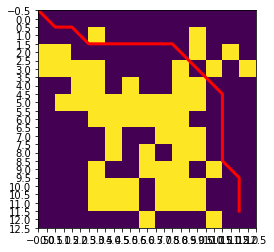

In [9]:
if __name__=="__main__":
    H,xedges,yedges,grid_size,source,destination,latLong = doPlot()
    
    threshold_limit = thresholdCalc(H)
    print("threshold",threshold_limit)
    print("h",H)
    reversesorted_array = H.copy();
    reversesorted_array[reversesorted_array < threshold_limit] = 0
    reversesorted_array[reversesorted_array >= threshold_limit] = 1
    plt.imshow(reversesorted_array)#,extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]])
    plt.yticks(np.arange(-0.5, len(reversesorted_array), 0.5))
    plt.xticks(np.arange(-0.5, len(reversesorted_array), 0.5))
    #valid = findChild(source,destination,grid_size)
    start = tuple(np.array([-73.55,45.49]))
    goal = tuple(np.array([-73.59,45.53]))

    start = (reversesorted_array.shape[0] - 1,reversesorted_array.shape[1] - 1)
    goal = (0,0)

    route = astar(start, goal, reversesorted_array )
#     print('route',route)
    if(isinstance(route, bool) and route == False):
        print("Path Not found")
    if(isinstance(route, list)):
        
        route = route + [start]
        print("route",route)
        routeArray = np.array(route)
        plt.plot(routeArray[:,1] - 0.5,
                 routeArray[:,0]  - 0.5, c='red', linewidth=3)
        #plt.show()